In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# Information gain
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df = pd.read_csv("data-channel-1.csv")

#ACF: the autocorrelation function


In [ ]:
attacks = df["Attacks"].astype('float')
plot_acf(attacks)

In [ ]:
X = df
y = X['Attacks']
X.drop(['Attacks'], axis=1, inplace=True)

In [ ]:
 df.columns[0:len(df.columns)]

Index(['Time', 'Power'], dtype='object')

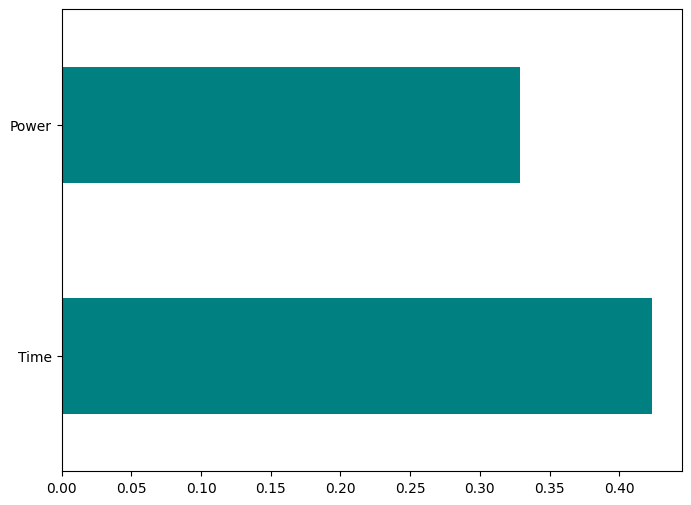

In [ ]:
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(attacks)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

# RNN

## Selección de caracteristicas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.feature_selection import chi2 # Calidad de las características
from sklearn.feature_selection import VarianceThreshold # Analizar caracterisitcas constates usando la varianza de los datos

In [ ]:
df = pd.read_csv("S1_balanced.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319440 entries, 0 to 319439
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Index                                5324 non-null    float64
 1   Time                                 5324 non-null    float64
 2   Attacks                              5324 non-null    float64
 3   Power                                319440 non-null  float64
 4   Count tcp W=15.0s                    319440 non-null  float64
 5   Count tcp.flags.syn == 1 W=15.0s In  319440 non-null  float64
 6   Count tcp.flags.reset == 1 W=15.0s   319440 non-null  float64
 7   Average frame.len W=15.0s            277495 non-null  float64
 8   Distinct tcp.srcport W=15.0s In      319440 non-null  float64
 9   Percent ssh W=15.0s                  277495 non-null  float64
dtypes: float64(10)
memory usage: 24.4 MB


In [ ]:
df_filtered = df.dropna()
df_filtered.head(5)

,Index,Time,Attacks,Power,Count tcp W=15.0s,Count tcp.flags.syn == 1 W=15.0s In,Count tcp.flags.reset == 1 W=15.0s,Average frame.len W=15.0s,Distinct tcp.srcport W=15.0s In,Percent ssh W=15.0s
59,1.0,1.700639e+12,0.0,317.36,25.0,0.0,0.0,109.84,1.0,0.64
119,2.0,1.700639e+12,0.0,305.52,25.0,0.0,0.0,109.84,1.0,0.64
179,3.0,1.700639e+12,0.0,303.60,25.0,0.0,0.0,109.84,1.0,0.64
239,4.0,1.700639e+12,0.0,325.28,25.0,0.0,0.0,109.84,1.0,0.64
299,5.0,1.700639e+12,0.0,382.96,25.0,0.0,0.0,109.84,1.0,0.64


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4469 entries, 59 to 319439
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Index                                4469 non-null   float64
 1   Time                                 4469 non-null   float64
 2   Attacks                              4469 non-null   float64
 3   Power                                4469 non-null   float64
 4   Count tcp W=15.0s                    4469 non-null   float64
 5   Count tcp.flags.syn == 1 W=15.0s In  4469 non-null   float64
 6   Count tcp.flags.reset == 1 W=15.0s   4469 non-null   float64
 7   Average frame.len W=15.0s            4469 non-null   float64
 8   Distinct tcp.srcport W=15.0s In      4469 non-null   float64
 9   Percent ssh W=15.0s                  4469 non-null   float64
dtypes: float64(10)
memory usage: 384.1 KB


In [ ]:
X = df_filtered
y = df_filtered["Attacks"]
X.drop(['Attacks'], axis=1, inplace=True)

<ipython-input-11-fa4776c0f7ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Attacks'], axis=1, inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
features_values = chi2(X_train, y_train)
features_values # Primer array el valor chi squared y el segundo array p-values

(array([59294.57356826, 28874.81417728, 61400.2635928 , 56658.88531641,
        75233.03242289, 72879.27945574, 35265.84134801, 13979.78378171,
          171.29041295]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.59951708e-30]))

In [ ]:
p_values=pd.Series(features_values[0])
p_values.index=X_train.columns
p_values.sort_index(ascending=False)

Time                                   28874.814177
Power                                  61400.263593
Percent ssh W=15.0s                      171.290413
Index                                  59294.573568
Distinct tcp.srcport W=15.0s In        13979.783782
Count tcp.flags.syn == 1 W=15.0s In    75233.032423
Count tcp.flags.reset == 1 W=15.0s     72879.279456
Count tcp W=15.0s                      56658.885316
Average frame.len W=15.0s              35265.841348
dtype: float64

In [ ]:
vt = VarianceThreshold(threshold=0) # threshold a 0 para eliminar caracterísitcas costantes
vt.fit(X_train)
sum(vt.get_support())

9

<function matplotlib.pyplot.show(close=None, block=None)>

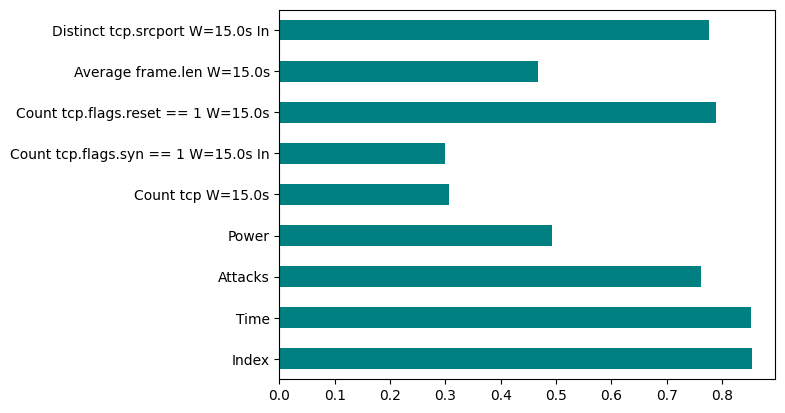

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show

 # Red neuronal básica

In [ ]:
df = pd.read_csv("S1_balanced.csv")

In [ ]:
df_filtered = df.dropna()
X = df_filtered
X.head(3)
X.drop(["Index"], axis=1, inplace=True)

<ipython-input-73-2c3a649782e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Index"], axis=1, inplace=True)


In [ ]:
X = df_filtered
X.dropna()
y = df_filtered["Attacks"]
X.drop(['Attacks'], axis=1, inplace=True)

<ipython-input-74-567601fca373>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Attacks'], axis=1, inplace=True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4469 entries, 59 to 319439
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time                                 4469 non-null   float64
 1   Power                                4469 non-null   float64
 2   Count tcp W=15.0s                    4469 non-null   float64
 3   Count tcp.flags.syn == 1 W=15.0s In  4469 non-null   float64
 4   Count tcp.flags.reset == 1 W=15.0s   4469 non-null   float64
 5   Average frame.len W=15.0s            4469 non-null   float64
 6   Distinct tcp.srcport W=15.0s In      4469 non-null   float64
 7   Percent ssh W=15.0s                  4469 non-null   float64
dtypes: float64(8)
memory usage: 314.2 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 3.64842454e-02, 4.97925311e-02, ...,
        3.82465753e-02, 4.76190476e-02, 6.40000000e-01],
       [4.21640216e-05, 5.80431177e-03, 4.97925311e-02, ...,
        3.82465753e-02, 4.76190476e-02, 6.40000000e-01],
       [8.64041540e-05, 8.29187396e-04, 4.97925311e-02, ...,
        3.82465753e-02, 4.76190476e-02, 6.40000000e-01],
       ...,
       [9.99959852e-01, 5.32752902e-02, 4.97925311e-02, ...,
        3.82465753e-02, 4.76190476e-02, 6.40000000e-01],
       [1.00000000e+00, 1.66666667e-01, 3.25726141e-01, ...,
        1.62762268e-01, 1.42857143e-01, 6.01265823e-01],
       [9.99975949e-01, 7.12686567e-01, 1.74273859e-01, ...,
        3.97421434e-02, 1.42857143e-01, 5.41176471e-01]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 2s 8ms/step - loss: -21.7091 - accuracy: 0.1462 - val_loss: -132.7425 - val_accuracy: 0.1105
Epoch 2/10
90/90 [==============================] - 0s 3ms/step - loss: -984.9836 - accuracy: 0.1283 - val_loss: -3423.1777 - val_accuracy: 0.1105
Epoch 3/10
90/90 [==============================] - 0s 4ms/step - loss: -9508.6787 - accuracy: 0.1283 - val_loss: -23499.1992 - val_accuracy: 0.1105
Epoch 4/10
90/90 [==============================] - 0s 5ms/step - loss: -43050.5625 - accuracy: 0.1283 - val_loss: -88091.2578 - val_accuracy: 0.1105
Epoch 5/10
90/90 [==============================] - 1s 6ms/step - loss: -130439.5547 - accuracy: 0.1283 - val_loss: -229756.7344 - val_accuracy: 0.1105
Epoch 6/10
90/90 [==============================] - 1s 6ms/step - loss: -305737.8125 - accuracy: 0.1283 - val_loss: -502485.8750 - val_accuracy: 0.1105
Epoch 7/10
90/90 [==============================] - 1s 6ms/step - loss: -619814.3125 - accuracy: 0.1283 -

In [ ]:
score = model.evaluate(X_test, y_test)
print('Precisión:', score[1])

28/28 [==============================] - 0s 2ms/step - loss: -3577571.7500 - accuracy: 0.1141
Precisión: 0.11409395933151245


In [ ]:
weights = model.layers[-1].get_weights()[0]
feature_importance = np.abs(weights.sum(axis=0))
print('Importancia de las características:', feature_importance)

# Seleccionar las características con mayor importancia
selected_features = np.argsort(feature_importance)[-10:]
print('Características seleccionadas:', selected_features)

Importancia de las características: [9.531042]
Características seleccionadas: [0]


# Red con ataques binarios

In [ ]:
df = pd.read_csv("S1_balanced.csv")

In [ ]:
df.head()

,Index,Time,Attacks,Power,Count tcp W=15.0s,Count tcp.flags.syn == 1 W=15.0s In,Count tcp.flags.reset == 1 W=15.0s,Average frame.len W=15.0s,Distinct tcp.srcport W=15.0s In,Percent ssh W=15.0s
0,NaN,NaN,NaN,317.60,0.0,0.0,0.0,NaN,0.0,NaN
1,NaN,NaN,NaN,316.80,0.0,0.0,0.0,NaN,0.0,NaN
2,NaN,NaN,NaN,317.04,0.0,0.0,0.0,NaN,0.0,NaN
3,NaN,NaN,NaN,317.60,0.0,0.0,0.0,NaN,0.0,NaN
4,NaN,NaN,NaN,325.12,23.0,1.0,0.0,231.434783,1.0,0.608696


In [ ]:
df["Attacks"] = df["Attacks"].apply(lambda x: 1 if x > 0 else x)

In [ ]:
X = df
X = X.dropna()
y = X["Attacks"]
X.drop(["Attacks", "Index", "Time"], axis=1, inplace=True)

<ipython-input-49-60451588cfe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Attacks", "Index", "Time"], axis=1, inplace=True)


In [ ]:
y.head()

59     0.0
119    0.0
179    0.0
239    0.0
299    0.0
Name: Attacks, dtype: float64

In [ ]:
X.describe()

,Power,Count tcp W=15.0s,Count tcp.flags.syn == 1 W=15.0s In,Count tcp.flags.reset == 1 W=15.0s,Average frame.len W=15.0s,Distinct tcp.srcport W=15.0s In,Percent ssh W=15.0s
count,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000,4469.000000
mean,374.064337,59.957485,4.831058,3.766167,150.123611,2.801969,0.496184
std,105.142059,62.715726,18.493106,13.231300,138.877665,4.181046,0.217264
min,303.280000,1.000000,0.000000,0.000000,54.000000,0.000000,0.000000
25%,310.240000,25.000000,0.000000,0.000000,108.480000,1.000000,0.447977
50%,321.280000,33.000000,0.000000,0.000000,109.840000,1.000000,0.580000
75%,368.480000,67.000000,0.000000,0.000000,114.315789,2.000000,0.640000
max,689.200000,483.000000,224.000000,213.000000,1514.000000,21.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X

array([[0.03648425, 0.04979253, 0.        , ..., 0.03824658, 0.04761905,
        0.64      ],
       [0.00580431, 0.04979253, 0.        , ..., 0.03824658, 0.04761905,
        0.64      ],
       [0.00082919, 0.04979253, 0.        , ..., 0.03824658, 0.04761905,
        0.64      ],
       ...,
       [0.05327529, 0.04979253, 0.        , ..., 0.03824658, 0.04761905,
        0.64      ],
       [0.16666667, 0.32572614, 0.00892857, ..., 0.16276227, 0.14285714,
        0.60126582],
       [0.71268657, 0.17427386, 0.        , ..., 0.03974214, 0.14285714,
        0.54117647]])

In [ ]:
X = (X - X.mean()) / X.std()
X.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
101/101 [==============================] - 2s 5ms/step - loss: 0.3566 - accuracy: 0.8729 - val_loss: 0.2443 - val_accuracy: 0.9022
Epoch 2/10
101/101 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9329 - val_loss: 0.2183 - val_accuracy: 0.9078
Epoch 3/10
101/101 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9350 - val_loss: 0.2021 - val_accuracy: 0.9190
Epoch 4/10
101/101 [==============================] - 0s 3ms/step - loss: 0.1779 - accuracy: 0.9403 - val_loss: 0.1978 - val_accuracy: 0.9302
Epoch 5/10
101/101 [==============================] - 0s 3ms/step - loss: 0.1640 - accuracy: 0.9450 - val_loss: 0.1855 - val_accuracy: 0.9385
Epoch 6/10
101/101 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9475 - val_loss: 0.1738 - val_accuracy: 0.9385
Epoch 7/10
101/101 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9478 - val_loss: 0.1662 - val_accuracy: 0.9497
Epoch 

In [ ]:
score = model.evaluate(X_test, y_test)
print('Precisión:', score[1])

28/28 [==============================] - 0s 3ms/step - loss: 0.1309 - accuracy: 0.9541
Precisión: 0.9541386961936951


## Red LSTM con ataques multiclases

In [ ]:
df = pd.read_csv("S1_balanced.csv")

df["TCP count"] = df["Count tcp W=15.0s"]
df["Syn flag"] = df["Count tcp.flags.syn == 1 W=15.0s In"]
df["Reset flag"] = df["Count tcp.flags.reset == 1 W=15.0s"]
df["Avg frame len"] = df["Average frame.len W=15.0s"]
df["Distinct port"] = df["Distinct tcp.srcport W=15.0s In"]
df["Percent ssh"] = df["Percent ssh W=15.0s"]
df.drop(["Count tcp.flags.syn == 1 W=15.0s In", "Count tcp.flags.reset == 1 W=15.0s",
         "Average frame.len W=15.0s", "Distinct tcp.srcport W=15.0s In", "Percent ssh W=15.0s", "Count tcp W=15.0s", "Index", "Time", "Reset flag"], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319440 entries, 0 to 319439
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Attacks        5324 non-null    float64
 1   Power          319440 non-null  float64
 2   TCP count      319440 non-null  float64
 3   Syn flag       319440 non-null  float64
 4   Avg frame len  277495 non-null  float64
 5   Distinct port  319440 non-null  float64
 6   Percent ssh    277495 non-null  float64
dtypes: float64(7)
memory usage: 17.1 MB


In [ ]:
df["Attacks"] = df["Attacks"].fillna(0)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277495 entries, 4 to 319439
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Attacks        277495 non-null  float64
 1   Power          277495 non-null  float64
 2   TCP count      277495 non-null  float64
 3   Syn flag       277495 non-null  float64
 4   Avg frame len  277495 non-null  float64
 5   Distinct port  277495 non-null  float64
 6   Percent ssh    277495 non-null  float64
dtypes: float64(7)
memory usage: 16.9 MB


In [ ]:
df_c = df.head(8000)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 4 to 9412
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Attacks        8000 non-null   float64
 1   Power          8000 non-null   float64
 2   TCP count      8000 non-null   float64
 3   Syn flag       8000 non-null   float64
 4   Avg frame len  8000 non-null   float64
 5   Distinct port  8000 non-null   float64
 6   Percent ssh    8000 non-null   float64
dtypes: float64(7)
memory usage: 500.0 KB


In [ ]:
X = df_c
y = X["Attacks"]
X.drop(["Attacks"], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

<ipython-input-79-167b91d033fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Attacks"], axis=1, inplace=True)


 **Normalizar los datos**

 La normalización consiste en escalar los datos para que tengan una media de 0 y una desviación estándar de 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)

**Arquitectura de la red neuronal recurrente**

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
5600/5600 - 36s - loss: 4.1892 - 36s/epoch - 6ms/step
Epoch 2/10
5600/5600 - 37s - loss: 4.1856 - 37s/epoch - 7ms/step
Epoch 3/10
5600/5600 - 40s - loss: 4.1816 - 40s/epoch - 7ms/step
Epoch 4/10
5600/5600 - 38s - loss: 4.1838 - 38s/epoch - 7ms/step
Epoch 5/10
5600/5600 - 38s - loss: 4.1779 - 38s/epoch - 7ms/step
Epoch 6/10
5600/5600 - 39s - loss: 4.1742 - 39s/epoch - 7ms/step
Epoch 7/10
5600/5600 - 32s - loss: 4.1803 - 32s/epoch - 6ms/step
Epoch 8/10
5600/5600 - 41s - loss: 4.1756 - 41s/epoch - 7ms/step
Epoch 9/10
5600/5600 - 29s - loss: 4.1700 - 29s/epoch - 5ms/step
Epoch 10/10
5600/5600 - 29s - loss: 4.1622 - 29s/epoch - 5ms/step


In [ ]:
model.evaluate(X_test, y_test)

75/75 [==============================] - 1s 3ms/step - loss: 0.7636


0.7635675668716431

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

75/75 [==============================] - 1s 3ms/step
Mean Squared Error: 0.7635674923720345
Root Mean Squared Error: 0.8738234903983954


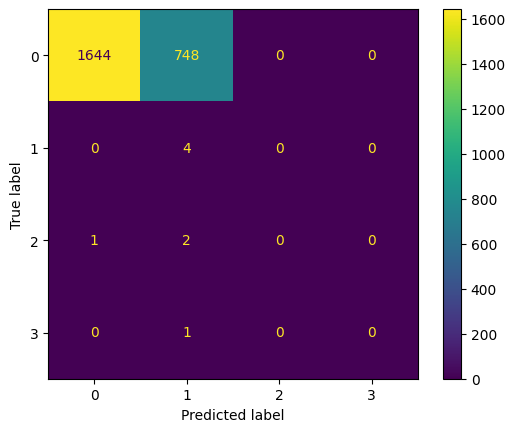

In [ ]:
y_pred_bin = np.round(y_pred)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bin)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

# Red LSTM con ataques binarios

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, Concatenate
from sklearn.feature_selection import chi2 # Calidad de las características
from sklearn.feature_selection import VarianceThreshold # Analizar caracterisitcas constates usando la varianza de los datos
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn import metrics
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv("S1_balanced.csv")

df["TCP count"] = df["Count tcp W=15.0s"]
df["Syn flag"] = df["Count tcp.flags.syn == 1 W=15.0s In"]
df["Reset flag"] = df["Count tcp.flags.reset == 1 W=15.0s"]
df["Avg frame len"] = df["Average frame.len W=15.0s"]
df["Distinct port"] = df["Distinct tcp.srcport W=15.0s In"]
df["Percent ssh"] = df["Percent ssh W=15.0s"]
df.drop(["Count tcp.flags.syn == 1 W=15.0s In", "Count tcp.flags.reset == 1 W=15.0s",
         "Average frame.len W=15.0s", "Distinct tcp.srcport W=15.0s In", "Percent ssh W=15.0s", "Count tcp W=15.0s", "Index", "Time", "Reset flag"], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319440 entries, 0 to 319439
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Attacks        5324 non-null    float64
 1   Power          319440 non-null  float64
 2   TCP count      319440 non-null  float64
 3   Syn flag       319440 non-null  float64
 4   Avg frame len  277495 non-null  float64
 5   Distinct port  319440 non-null  float64
 6   Percent ssh    277495 non-null  float64
dtypes: float64(7)
memory usage: 17.1 MB


In [ ]:
columns = df.columns
df[columns].corr()

,Attacks,Power,TCP count,Syn flag,Avg frame len,Distinct port,Percent ssh
Attacks,1.000000,-0.005040,0.018177,0.478333,-0.188305,-0.113422,-0.751052
Power,-0.005040,1.000000,0.241182,-0.004736,0.204749,0.284421,-0.003866
TCP count,0.018177,0.241182,1.000000,0.751469,0.126930,0.458587,-0.514886
Syn flag,0.478333,-0.004736,0.751469,1.000000,-0.189174,0.011746,-0.633338
Avg frame len,-0.188305,0.204749,0.126930,-0.189174,1.000000,0.033200,0.008267
Distinct port,-0.113422,0.284421,0.458587,0.011746,0.033200,1.000000,-0.025825
Percent ssh,-0.751052,-0.003866,-0.514886,-0.633338,0.008267,-0.025825,1.000000


In [ ]:
df["Attacks"] = df["Attacks"].fillna(0)
df["Attacks"] = df["Attacks"].apply(lambda x: 1 if x > 0 else x)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277495 entries, 4 to 319439
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Attacks        277495 non-null  float64
 1   Power          277495 non-null  float64
 2   TCP count      277495 non-null  float64
 3   Syn flag       277495 non-null  float64
 4   Avg frame len  277495 non-null  float64
 5   Distinct port  277495 non-null  float64
 6   Percent ssh    277495 non-null  float64
dtypes: float64(7)
memory usage: 16.9 MB


In [ ]:
df_c = df.head(5000)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 4 to 5590
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Attacks        5000 non-null   float64
 1   Power          5000 non-null   float64
 2   TCP count      5000 non-null   float64
 3   Syn flag       5000 non-null   float64
 4   Avg frame len  5000 non-null   float64
 5   Distinct port  5000 non-null   float64
 6   Percent ssh    5000 non-null   float64
dtypes: float64(7)
memory usage: 312.5 KB


In [ ]:
X = df_c
y = X["Attacks"]
X.drop(["Attacks"], axis=1, inplace=True)

<ipython-input-144-365a858a89e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Attacks"], axis=1, inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca = pca.fit(X_train)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train_pca)

In [ ]:
num_layers = 6
hidden_dim = 256

In [ ]:
model = tf.keras.Sequential()

In [ ]:
for _ in range(num_layers):
    model.add(tf.keras.layers.LSTM(hidden_dim, return_sequences=True))

In [ ]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
X_train = np.expand_dims(X_train, axis=1)

In [ ]:
model = tf.keras.Sequential([
    # Capa de entrada
    layers.Input(shape=(7,)),

    # Capas recurrentes
    layers.LSTM(hidden_dim, return_sequences=True, input_shape=(7,)),
    layers.LSTM(hidden_dim),

    # Capa de salida
    layers.Dense(1, activation='sigmoid')
])


ValueError: Input 0 of layer "lstm_44" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 7)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
4000/4000 - 43s - loss: 0.0056 - 43s/epoch - 11ms/step
Epoch 2/3
4000/4000 - 32s - loss: 0.0047 - 32s/epoch - 8ms/step
Epoch 3/3
4000/4000 - 33s - loss: 0.0047 - 33s/epoch - 8ms/step


In [ ]:
model.evaluate(X_test_pca, y_test)

38/38 [==============================] - 1s 3ms/step - loss: 0.3555


0.3554871380329132

In [ ]:
y_pred = model.predict(X_test_pca)
y_pred_bin = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_bin)
recall = recall_score(y_test, y_pred_bin)
precision = precision_score(y_test, y_pred_bin)

print("Acierto:", accuracy)
print("Recuerdo:", recall)
print("Precisión:", precision)

38/38 [==============================] - 1s 4ms/step
Acierto: 0.20166666666666666
Recuerdo: 0.0
Precisión: 0.0


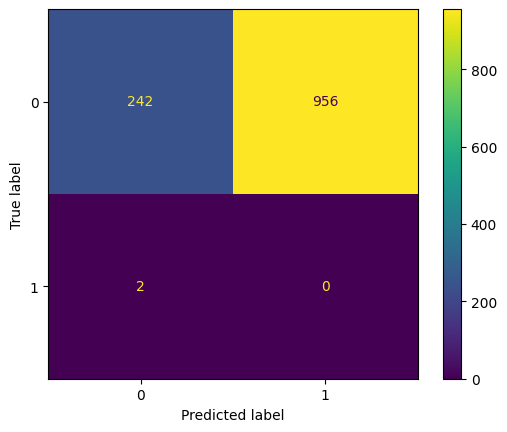

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bin)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# CNN con ataques binarios

In [ ]:
df = pd.read_csv("S1_balanced.csv")

df["TCP count"] = df["Count tcp W=15.0s"]
df["Syn flag"] = df["Count tcp.flags.syn == 1 W=15.0s In"]
df["Reset flag"] = df["Count tcp.flags.reset == 1 W=15.0s"]
df["Avg frame len"] = df["Average frame.len W=15.0s"]
df["Distinct port"] = df["Distinct tcp.srcport W=15.0s In"]
df["Percent ssh"] = df["Percent ssh W=15.0s"]
df.drop(["Count tcp.flags.syn == 1 W=15.0s In", "Count tcp.flags.reset == 1 W=15.0s",
         "Average frame.len W=15.0s", "Distinct tcp.srcport W=15.0s In", "Percent ssh W=15.0s", "Count tcp W=15.0s", "Index", "Time", "Reset flag"], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319440 entries, 0 to 319439
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Attacks        5324 non-null    float64
 1   Power          319440 non-null  float64
 2   TCP count      319440 non-null  float64
 3   Syn flag       319440 non-null  float64
 4   Avg frame len  277495 non-null  float64
 5   Distinct port  319440 non-null  float64
 6   Percent ssh    277495 non-null  float64
dtypes: float64(7)
memory usage: 17.1 MB


In [ ]:
df["Attacks"] = df["Attacks"].fillna(0)
df["Attacks"] = df["Attacks"].apply(lambda x: 1 if x > 0 else x)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277495 entries, 4 to 319439
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Attacks        277495 non-null  float64
 1   Power          277495 non-null  float64
 2   TCP count      277495 non-null  float64
 3   Syn flag       277495 non-null  float64
 4   Avg frame len  277495 non-null  float64
 5   Distinct port  277495 non-null  float64
 6   Percent ssh    277495 non-null  float64
dtypes: float64(7)
memory usage: 16.9 MB


In [ ]:
df_c = df.head(8000)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 4 to 9412
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Attacks        8000 non-null   float64
 1   Power          8000 non-null   float64
 2   TCP count      8000 non-null   float64
 3   Syn flag       8000 non-null   float64
 4   Avg frame len  8000 non-null   float64
 5   Distinct port  8000 non-null   float64
 6   Percent ssh    8000 non-null   float64
dtypes: float64(7)
memory usage: 500.0 KB


In [ ]:
X = df_c
y = X["Attacks"]
X.drop(["Attacks"], axis=1, inplace=True)

<ipython-input-97-365a858a89e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(["Attacks"], axis=1, inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

In [ ]:
X_train.shape

(6400, 6)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 5, 64)             192       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                6450      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6693 (26.14 KB)
Trainable params: 6693 (26.14 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, verbose=2)

In [ ]:
model_cnn.evaluate(X_test, y_test)

50/50 [==============================] - 0s 4ms/step - loss: 55.4601


55.460121154785156

In [ ]:
y_pred = model.predict(X_test)
y_pred_bin = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_bin)
recall = recall_score(y_test, y_pred_bin)
precision = precision_score(y_test, y_pred_bin)

print("Acierto:", accuracy)
print("Recuerdo:", recall)
print("Precisión:", precision)

50/50 [==============================] - 59s 3ms/step
Acierto: 0.9975
Recuerdo: 0.0
Precisión: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


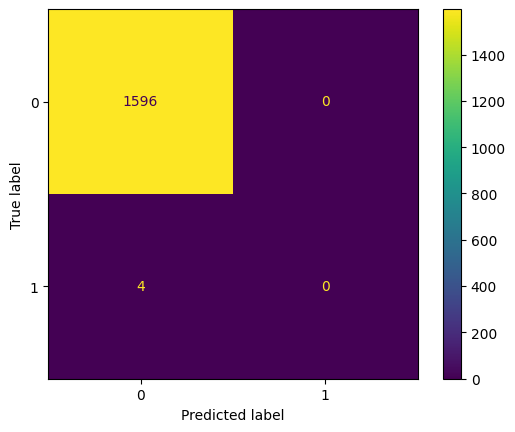

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bin)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()